In [8]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [49]:
f = h5py.File('taxi_ai4all_data.h5', 'r')
X = np.array(f['X'])
y = np.array(f['y'])

In [50]:
# Split into training and validation sets
X_train = X[:, :18000]
y_train = y[:, :18000]

X_val = X[:, 18000:]
y_val = y[:, 18000:]

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [33]:
def build_model(layer_sizes):
    model = Sequential()
    for i in range(1, len(layer_sizes) - 1):
        model.add(Dense(layer_sizes[i], activation = 'relu'))
    model.add(Dense(layer_sizes[-1]))
    return model

In [57]:
model = build_model([128, 64, 32, 16, 2])

In [35]:
from tensorflow.keras.optimizers import SGD

In [37]:
opt = SGD(learning_rate=0.001, momentum=0.9)

In [58]:
model.compile(optimizer=opt, loss='mse', metrics='mse')

In [59]:
model.fit(X_train.T, y_train.T, epochs=100, batch_size=64, validation_data=(X_val.T, y_val.T), verbose=1)

Epoch 1/100
282/282 [==============================] - 1s 1ms/step - loss: 59.3916 - mse: 59.3916 - val_loss: 61.4135 - val_mse: 61.4135
Epoch 2/100
282/282 [==============================] - 0s 848us/step - loss: 33.1213 - mse: 33.1213 - val_loss: 25.6286 - val_mse: 25.6286
Epoch 3/100
282/282 [==============================] - 0s 788us/step - loss: 15.0994 - mse: 15.0994 - val_loss: 14.6489 - val_mse: 14.6489
Epoch 4/100
282/282 [==============================] - 0s 804us/step - loss: 5.1841 - mse: 5.1841 - val_loss: 12.9028 - val_mse: 12.9028
Epoch 5/100
282/282 [==============================] - 0s 762us/step - loss: 3.2608 - mse: 3.2608 - val_loss: 7.3281 - val_mse: 7.3281
Epoch 6/100
282/282 [==============================] - 0s 809us/step - loss: 2.1011 - mse: 2.1011 - val_loss: 1.5690 - val_mse: 1.5690
Epoch 7/100
282/282 [==============================] - 0s 780us/step - loss: 1.7169 - mse: 1.7169 - val_loss: 1.1500 - val_mse: 1.1500
Epoch 8/100
282/282 [======================

In [62]:
y_pred = model.predict(X.T)

In [65]:
errors = np.abs(y_pred.T - y)

In [67]:
import matplotlib.pyplot as plt

(array([9.747e+03, 6.608e+03, 2.732e+03, 7.210e+02, 1.450e+02, 3.500e+01,
        6.000e+00, 3.000e+00, 0.000e+00, 3.000e+00]),
 array([1.38240914e-06, 1.86461868e-01, 3.72922353e-01, 5.59382838e-01,
        7.45843324e-01, 9.32303809e-01, 1.11876429e+00, 1.30522478e+00,
        1.49168526e+00, 1.67814575e+00, 1.86460624e+00]),
 <BarContainer object of 10 artists>)

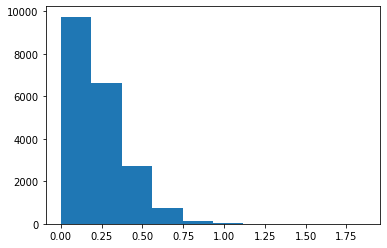

In [69]:
plt.hist(errors[0, :])

(array([1.6595e+04, 3.1800e+03, 2.1300e+02, 6.0000e+00, 0.0000e+00,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([7.05861370e-06, 9.46175403e-01, 1.89234375e+00, 2.83851209e+00,
        3.78468044e+00, 4.73084878e+00, 5.67701713e+00, 6.62318547e+00,
        7.56935381e+00, 8.51552216e+00, 9.46169050e+00]),
 <BarContainer object of 10 artists>)

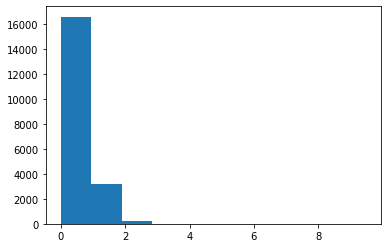

In [70]:
plt.hist(errors[1, :])

In [75]:
model.save('Taxinet.h5')

In [76]:
model.predict(X[:, 0][np.newaxis, :])[0]

array([8.827959, 8.171246], dtype=float32)